# Machine Learning - DVF sans outliers

In [0]:
#!pip install pycaret

In [0]:
#!pip install pandas-profiling[notebook,html]

### Importation des librairies 

In [3]:
import pandas as pd
from pycaret.regression import *
from pandas_profiling import ProfileReport
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importation du dataset 

In [4]:
dvf=pd.read_csv("/content/drive/My Drive/data/dvf3.csv")
dvf.head()

,valeur_fonciere,regions,type_local,nature_mutation,nombre_pieces_principales
0,115000.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
1,175050.0,SudEst,Maison,Vente,5.0
2,165900.0,SudEst,Maison,Vente,4.0
3,181800.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
4,177000.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0


### Remarques :
 *  Ce Dataframe comporte toutes les valeurs foncières, y compris les outliers.
 *  Pour faciliter les tests des algorithmes je crée un sample de 100000 entrées. 

In [5]:
dvf_sample= dvf.sample(n=100000,random_state=42).reset_index(drop=True)
dvf_sample.shape
dvf_sample

,valeur_fonciere,regions,type_local,nature_mutation,nombre_pieces_principales
0,179550.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
1,115000.0,SudOuest,Local industriel. commercial ou assimilé,Vente,0.0
2,105000.0,SudEst,Local industriel. commercial ou assimilé,Vente,0.0
3,150000.0,RegionParis,Appartement,Vente,4.0
4,74000.0,NordOuest,Dépendance,Vente,0.0
...,...,...,...,...,...
99995,117500.0,RegionParis,Local industriel. commercial ou assimilé,Vente,0.0
99996,64000.0,NordEst,Appartement,Vente,1.0
99997,70000.0,NordOuest,Local industriel. commercial ou assimilé,Vente,0.0
99998,160000.0,NordOuest,Maison,Vente,4.0


In [6]:
#profile = ProfileReport(dvf_sample, title='DVF without Outliers Profiling Report')
#profile

In [7]:
#profile.to_file(output_file="dvf_without_outliers_report.html")

### Séparation du dataframe en 2

Afin de démontrer la fonction Predict_model () sur des données invisibles, un échantillon de 5000 enregistrements a été retenu de l'ensemble de données d'origine pour être utilisé pour les prévisions. Cela ne doit pas être confondu avec une séparation train / test, car cette séparation particulière est effectuée pour simuler un scénario réel. Une autre façon de penser à cela est que ces 5000 enregistrements ne sont pas disponibles au moment où l'expérience d'apprentissage automatique a été effectuée.

In [8]:
dfmodel= dvf_sample.sample(frac=0.95,random_state=42).reset_index(drop=True)
dfhide=dvf_sample.drop(dfmodel.index).reset_index(drop=True)
print("Shape du dfmodel: "+ str(dfmodel.shape))
print("Shape du dfhide: "+ str(dfhide.shape))

Shape du dfmodel: (95000, 5)
Shape du dfhide: (5000, 5)


### Configuration du dataset

La fonction setup () initialise l'environnement dans pycaret et crée le pipeline de transformation pour préparer les données pour la modélisation et le déploiement. setup () doit être appelé avant d'exécuter toute autre fonction dans pycaret. Il prend deux paramètres obligatoires: une trame de données pandas et le nom de la colonne cible. Tous les autres paramètres sont facultatifs et sont utilisés pour personnaliser le pipeline de prétraitement.

1.   Data Scale
2.   Target transformation

In [9]:
data=setup(data=dfmodel, target='valeur_fonciere', session_id=42, normalize = True, transformation = True, transform_target = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(95000, 5)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparaison des différents algorithmes de régression

La fonction forme tous les modèles de la bibliothèque de modèles et les note à l'aide de la validation croisée kfold pour l'évaluation métrique. La sortie imprime une grille de score qui montre la moyenne des MAE, MSE, RMSE, R2, RMSLE et MAPE à travers les plis (10 par défaut) de tous les modèles disponibles dans la bibliothèque de modèles.

In [10]:
compare_models()

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:45:41
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,38241.4836,2.105499e+09,45882.7351,0.1346,0.4045,0.3741
1,Extreme Gradient Boosting,38246.6595,2.105490e+09,45882.6792,0.1346,0.4045,0.3742
2,Random Forest,38213.1700,2.107628e+09,45906.0334,0.1337,0.4046,0.3737
3,Extra Trees Regressor,38219.5760,2.108554e+09,45916.0991,0.1333,0.4047,0.3737
4,Decision Tree,38223.9136,2.109690e+09,45928.4130,0.1329,0.4048,0.3738
5,Ridge Regression,38523.0725,2.128837e+09,46136.2947,0.1250,0.4064,0.3769
6,Least Angle Regression,38522.6509,2.128846e+09,46136.3981,0.1250,0.4064,0.3769
7,Bayesian Ridge,38524.3415,2.128813e+09,46136.0402,0.1250,0.4064,0.3770
8,Linear Regression,38519.6092,2.129235e+09,46140.5951,0.1248,0.4064,0.3768
9,Random Sample Consensus,38319.7262,2.145184e+09,46312.5759,0.1183,0.4075,0.3756


LightGBMError: ignored

### Création d'un modèle

Création du modèle Random Forest Regressor qui a un des meilleurs scores.

In [11]:
xgboost=create_model('xgboost', fold = 5)
xgboost

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37681.3693,2.054474e+09,45326.3101,0.1468,0.4022,0.3726
1,38011.0055,2.077633e+09,45581.0553,0.1445,0.4040,0.3747
2,38580.2492,2.134564e+09,46201.3408,0.1199,0.4050,0.3743
3,38162.8831,2.095075e+09,45771.9902,0.1411,0.4034,0.3727
4,38795.6950,2.166811e+09,46549.0177,0.1210,0.4082,0.3766
Mean,38246.2404,2.105711e+09,45885.9428,0.1347,0.4046,0.3742
SD,398.7043,4.023037e+07,437.7841,0.0117,0.0020,0.0015


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

### Tune model

Lorsqu'un modèle est créé à l'aide de la fonction create_model (), il utilise les hyperparamètres par défaut. Afin de régler les hyperparamètres, la fonction tune_model () est utilisée. Cette fonction règle automatiquement les hyperparamètres d'un modèle sur un espace de recherche prédéfini et le note à l'aide de la validation croisée kfold. La sortie imprime une grille de score qui montre MAE, MSE, RMSE, R2, RMSLE et MAPE par pli.

In [12]:
tuned_xgboost = tune_model('xgboost', fold = 5, n_iter=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37701.1400,2.062382e+09,45413.4603,0.1435,0.4028,0.3724
1,37978.8058,2.080906e+09,45616.9516,0.1431,0.4042,0.3743
2,38518.2506,2.136096e+09,46217.9173,0.1193,0.4050,0.3737
3,38153.7437,2.099463e+09,45819.9026,0.1393,0.4036,0.3725
4,38765.8444,2.169506e+09,46577.9512,0.1199,0.4082,0.3759
Mean,38223.5569,2.109671e+09,45929.2366,0.1330,0.4048,0.3738
SD,379.1086,3.859084e+07,419.4445,0.0111,0.0019,0.0013


In [13]:
tuned_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=2, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=0)

### Visualisation du modèle


#### Residual Plot

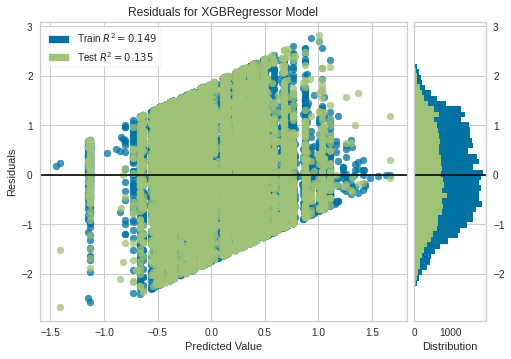

In [14]:
plot_model(tuned_xgboost)

#### Prediction Error Plot

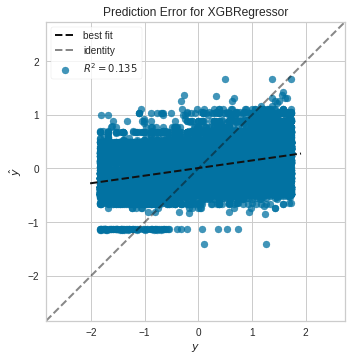

In [15]:
plot_model(tuned_xgboost, plot = 'error')

#### Feature Importance Plot

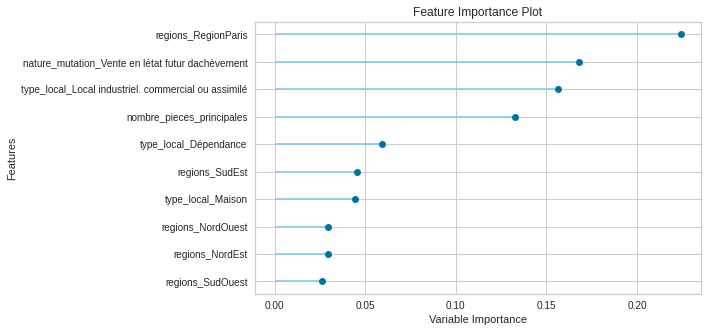

In [16]:
plot_model(tuned_xgboost, plot='feature')

### Prédiction sur le Test


Avant de finaliser le modèle, il est conseillé d'effectuer une dernière vérification en prédisant l'ensemble de test et en examinant les mesures d'évaluation.

In [17]:
predict_model(tuned_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,38404.1614,2.125421e+09,46102.2938,0.1261,0.4064,0.3762


,nombre_pieces_principales,regions_DOMTOM,regions_NordEst,regions_NordOuest,regions_RegionParis,regions_SudEst,regions_SudOuest,type_local_Appartement,type_local_Dépendance,type_local_Local industriel. commercial ou assimilé,type_local_Maison,nature_mutation_Vente,nature_mutation_Vente en létat futur dachèvement,nature_mutation_Vente terrain à bâtir,0,Label
0,0.382018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,119000.0,111390.296875
1,0.382018,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,50000.0,117370.851562
2,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,74835.0,115862.093750
3,2.012640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,135000.0,156282.921875
4,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70000.0,115862.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,0.819472,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,183000.0,135111.250000
19946,-1.144460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,154000.0,102227.781250
19947,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,72000.0,121694.812500
19948,0.382018,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67500.0,126481.468750


### Finalisation du modèle

La fonction finalize_model () ajuste le modèle sur l'ensemble de données complet, y compris l'échantillon test / hold-out (30% dans ce cas). Le but de cette fonction est de former le modèle sur l'ensemble de données complet avant son déploiement en production.

In [18]:
final_xgboost = finalize_model(tuned_xgboost)
final_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=2, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=0)

In [19]:
predict_model(final_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,38330.4955,2.115799e+09,45997.8194,0.1301,0.4052,0.3748


,nombre_pieces_principales,regions_DOMTOM,regions_NordEst,regions_NordOuest,regions_RegionParis,regions_SudEst,regions_SudOuest,type_local_Appartement,type_local_Dépendance,type_local_Local industriel. commercial ou assimilé,type_local_Maison,nature_mutation_Vente,nature_mutation_Vente en létat futur dachèvement,nature_mutation_Vente terrain à bâtir,0,Label
0,0.382018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,119000.0,110253.335938
1,0.382018,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,50000.0,118877.078125
2,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,74835.0,115494.656250
3,2.012640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,135000.0,157490.828125
4,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70000.0,115494.656250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,0.819472,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,183000.0,134912.203125
19946,-1.144460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,154000.0,101873.679688
19947,0.382018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,72000.0,118404.187500
19948,0.382018,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67500.0,127120.484375


### Prédiction sur les données cachées


In [20]:
hide_predictions = predict_model(final_xgboost, data=dfhide)
hide_predictions.head()

,valeur_fonciere,regions,type_local,nature_mutation,nombre_pieces_principales,Label
0,163000.0,SudEst,Dépendance,Vente,0.0,128233.921875
1,73000.0,NordOuest,Maison,Vente,3.0,115494.656250
2,157300.0,SudOuest,Dépendance,Vente,0.0,118267.929688
3,209000.0,NordEst,Maison,Vente,5.0,134608.765625
4,49000.0,RegionParis,Local industriel. commercial ou assimilé,Vente,0.0,129415.296875


### Sauvegarde du model 

In [21]:
save_model(final_xgboost,'FinalXGBoost')

Transformation Pipeline and Model Succesfully Saved
